<a href="https://colab.research.google.com/github/jumbokh/nknu-class/blob/main/CNN/notebooks/Cifar10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Keras] 使用 CNN 建立 Cifar-10 的分類器 (實戰篇)
#### https://clay-atlas.com/blog/2019/10/03/python-chinese-tutorial-keras-cnn-cifar10/

In [1]:
!pip install keras.utils
!pip install graphViz
!pip install pydot==1.2.4

  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2656 sha256=a8dcec26c2947eaa9e3a4f19a4a7f7d2a70e3a0e4ea0c4fb8a9ef048ba7517dc
  Stored in directory: /root/.cache/pip/wheels/d0/dd/3b/493952a5240d486a83805d65360dedadbadeae71d25e2c877f
Successfully built keras.utils
     |████████████████████████████████| 132 kB 5.4 MB/s 
  Created wheel for pydot: filename=pydot-1.2.4-py3-none-any.whl size=18956 sha256=725d545d989fcba2927043916eeee70f3a06069fb796ae10d4aa648d0cc928a9
  Stored in directory: /root/.cache/pip/wheels/05/f6/2d/6dd07d0bd13d66d5b4d74e966cb5da86a59fedd6b39adc4a4d
Successfully built pydot
  Attempting uninstall: pydot
    Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -fs /content/gdrive/My\ Drive /app
!tar -xzvf /app/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# 檢查是否安裝成功
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

Mounted at /content/gdrive
cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.5.0
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 5
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras import optimizers
from keras.models import Sequential, load_model
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

In [4]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
x_train = X_train.astype('float32')/255
x_test = X_test.astype('float32')/255
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

170508288/170498071 [==============================] - 5s 0us/step


In [5]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(rate=0.2))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(rate=0.2))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=2))
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(10, activation='softmax'))

In [6]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 128)         0

In [7]:
model.compile(loss='categorical_crossentropy',  optimizer='adam',metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=64, verbose=1,validation_split=0.2)

Epoch 1/50
625/625 [==============================] - 52s 35ms/step - loss: 1.6145 - accuracy: 0.4055 - val_loss: 1.2619 - val_accuracy: 0.5385
Epoch 2/50
625/625 [==============================] - 20s 32ms/step - loss: 1.1208 - accuracy: 0.5987 - val_loss: 0.9498 - val_accuracy: 0.6677
Epoch 3/50
625/625 [==============================] - 20s 32ms/step - loss: 0.9280 - accuracy: 0.6696 - val_loss: 0.8053 - val_accuracy: 0.7129
Epoch 4/50
625/625 [==============================] - 20s 32ms/step - loss: 0.7966 - accuracy: 0.7157 - val_loss: 0.7567 - val_accuracy: 0.7298
Epoch 5/50
625/625 [==============================] - 20s 32ms/step - loss: 0.6954 - accuracy: 0.7560 - val_loss: 0.6908 - val_accuracy: 0.7575
Epoch 6/50
625/625 [==============================] - 20s 32ms/step - loss: 0.6183 - accuracy: 0.7834 - val_loss: 0.7228 - val_accuracy: 0.7567
Epoch 7/50
625/625 [==============================] - 20s 32ms/step - loss: 0.5625 - accuracy: 0.8013 - val_loss: 0.6744 - val_accuracy:

In [8]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test:')
print('Loss:', loss)
print('Accuracy:', accuracy)

313/313 [==============================] - 3s 8ms/step - loss: 0.9665 - accuracy: 0.7887
Test:
Loss: 0.9665414094924927
Accuracy: 0.7886999845504761


In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

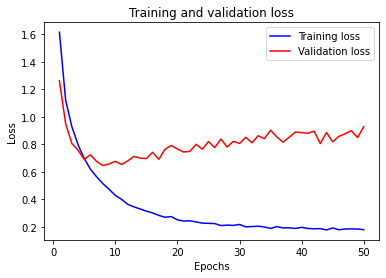

In [10]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
valacc = history.history['val_accuracy']
valloss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, valloss, 'r', label='Validation loss')
# b is for "solid blue line"
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [11]:
print(accuracy)

0.7886999845504761


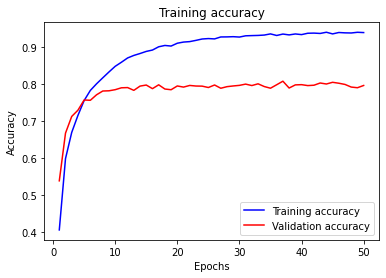

In [12]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
valacc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'b', label='Training accuracy')
plt.plot(epochs, valacc_values, 'r', label='Validation accuracy')
plt.title('Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [12]:
model.save('cifar10-keras.h5')